In [ ]:
!nvidia-smi

Mon Jan 22 17:02:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics roboflow -q


In [ ]:
from IPython import display
from IPython.display import display, Image
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
import roboflow
from roboflow import Roboflow
import supervision as sv

Ultralytics YOLOv8.1.4 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [ ]:
roboflow.login()

rf = Roboflow()

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).


In [ ]:
project = rf.workspace("boats-hu0jt").project("boat-tracking-model")
dataset = project.version(1).download("yolov5-obb")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Boat-Tracking-Model-1 in yolov5-obb:: 100%|██████████| 1494/1494 [00:00<00:00, 2361.59it/s]


In [ ]:
DATA_SET= dataset.location

In [ ]:
import os

# Specify the path to the folder
def changeFolderName(folder_path):
    # Specify the current folder name
    current_folder_name = 'labelTxt'

    # Specify the new folder name
    new_folder_name = 'labels'

    # Construct the full paths for the current and new folders
    current_folder_path = os.path.join(folder_path, current_folder_name)
    new_folder_path = os.path.join(folder_path, new_folder_name)

    # Rename the folder
    os.rename(current_folder_path, new_folder_path)


changeFolderName(f"{DATA_SET}/train/")
changeFolderName(f"{DATA_SET}/valid/")
changeFolderName(f"{DATA_SET}/test/")


In [ ]:
import os

# Define the classes and their indixs
class_names =['ship']
class_indixs = {name: index for index, name in enumerate(class_names)}


img_width, img_height = 640, 640


folder_path = "/content/Boat-Tracking-Model-1/test/labels"


    # Function to normalize coordinates
def normalize_coordinates(coord, max_value):
        return float(coord) / max_value

    # Process each file in the folder
for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):  # assuming the annotation files are .txt files
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                lines = file.readlines()


            new_lines = []
            for line in lines:
                parts = line.strip().split(' ')
                if len(parts) == 10:
                    # Extract label and coordinates
                    label = parts[-2]
                    coords = parts[:8]

                    # Get the class index
                    class_index = class_indixs.get(label, -1)
                    if class_index != -1:
                        # Normalize coordinates
                        normalized_coords = [normalize_coordinates(coords[i], img_width if i % 2 == 0 else img_height) for i in range(8)]

                        # Convert to the desired format and add to new lines
                        new_line = f"{class_index} " + " ".join(map(str, normalized_coords))
                        new_lines.append(new_line)

            # Write the converted lines to a new file or overwrite the existing file
            with open(file_path, 'w') as file:
                file.write('\n'.join(new_lines))



In [ ]:
%cd {HOME}

!yolo task=obb mode=train model=yolov8m-obb.pt data={DATA_SET}/data.yaml epochs=50 imgsz=640 batch=10

/content
Ultralytics YOLOv8.1.4 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8m-obb.pt, data=/content/Boat-Tracking-Model-1/data.yaml, epochs=50, time=None, patience=50, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

/content


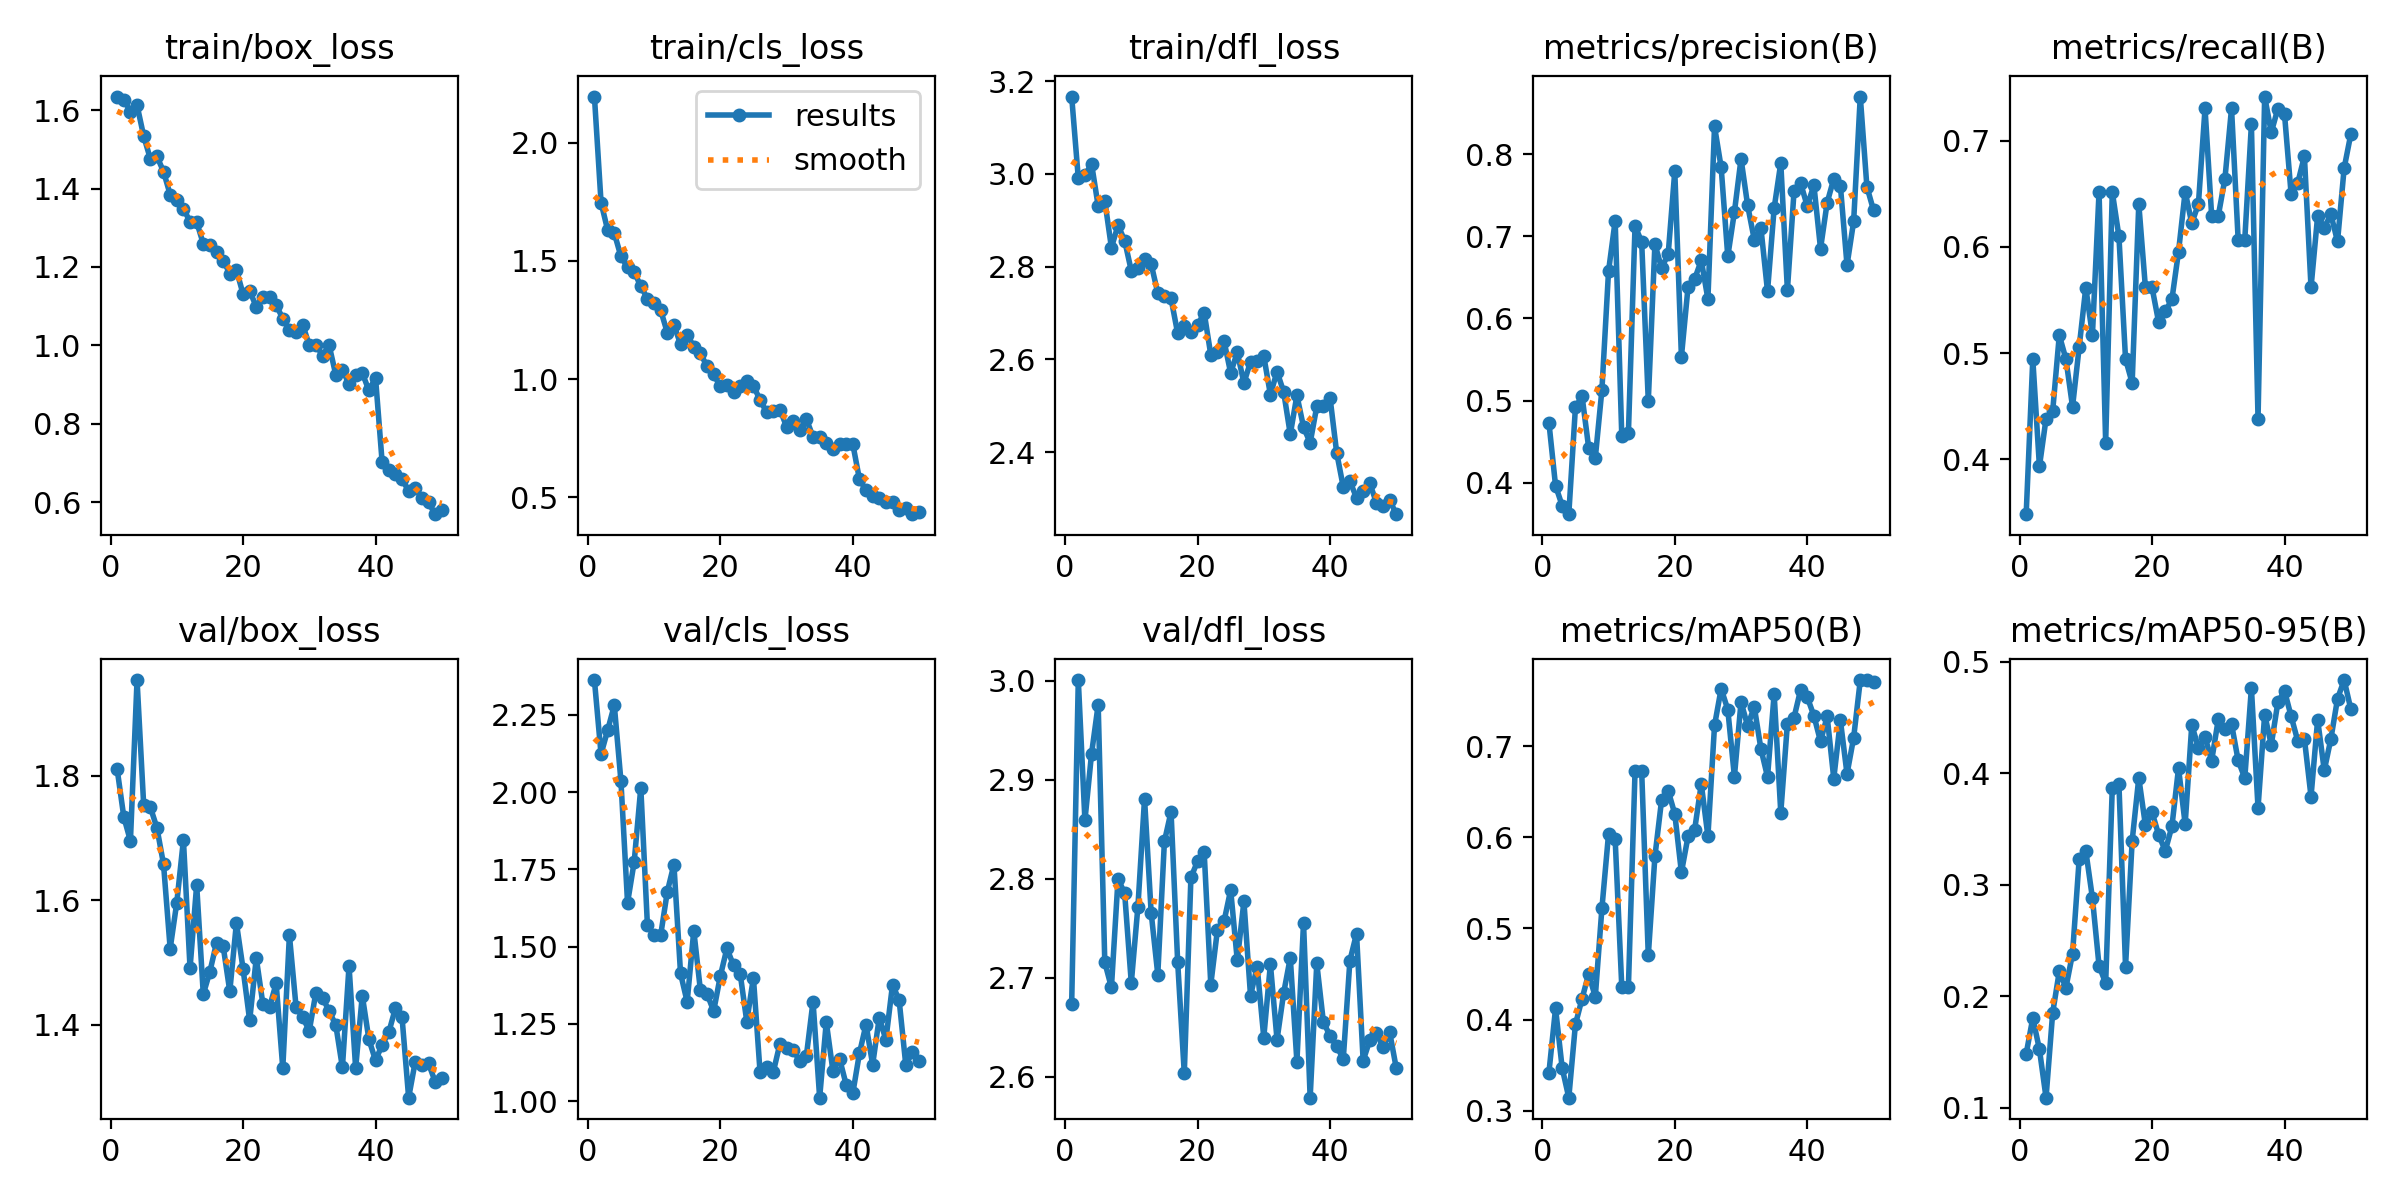

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/obb/train6/results.png', width=1400)

In [ ]:
!pip install pytube -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
from pytube import YouTube

def Download(link):
    youtubeObject = YouTube(link)
    youtubeObject = youtubeObject.streams.get_highest_resolution()
    try:
        youtubeObject.download()
    except:
        print("An error has occurred")
    print("Download is completed successfully")


link = input("Enter the YouTube video URL: ")
Download(link)

In [ ]:
%cd {HOME}
!yolo task=obb mode=predict model={HOME}/runs/obb/train6/weights/best.pt conf=0.4 source="/content/Boat-Tracking-Model-1/test/images" save=true

/content
Ultralytics YOLOv8.1.4 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-obb summary (fused): 237 layers, 26400646 parameters, 0 gradients, 80.8 GFLOPs

image 1/8 /content/Boat-Tracking-Model-1/test/images/a25_jpeg.rf.b5542e56e5cc57439762c19cf1f637cd.jpg: 640x640 40.6ms
image 2/8 /content/Boat-Tracking-Model-1/test/images/a29_JPG.rf.e981986a96371bd2dbc17ab6c4372b98.jpg: 640x640 38.6ms
image 3/8 /content/Boat-Tracking-Model-1/test/images/a7_jpg.rf.bc5e45fb58c54643afb42aebb93285ff.jpg: 640x640 38.5ms
image 4/8 /content/Boat-Tracking-Model-1/test/images/b14_jpg.rf.e1f83fe247388da4f26e04976004e7ab.jpg: 640x640 38.6ms
image 5/8 /content/Boat-Tracking-Model-1/test/images/b25_jpg.rf.2a923fca795be23944ba76667573f7de.jpg: 640x640 (no detections), 43.8ms
image 6/8 /content/Boat-Tracking-Model-1/test/images/b37_jpg.rf.fc547a654bb12b15631cf4063486d3a1.jpg: 640x640 35.5ms
image 7/8 /content/Boat-Tracking-Model-1/test/images/b39_jpg.rf.6c900015ece17034ee8914f8e4cbfa2e.j

In [ ]:
!pip install supervision

import supervision as sv

image_paths = sv.list_files_with_extensions(directory="/content/runs/obb/predict",extensions=["png", "jpg", "jpg"])

print('image count:', len(image_paths))

image count: 16


In [ ]:
IMAGE_DIR_PATH = "/content/runs/obb/predict"
SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 16)

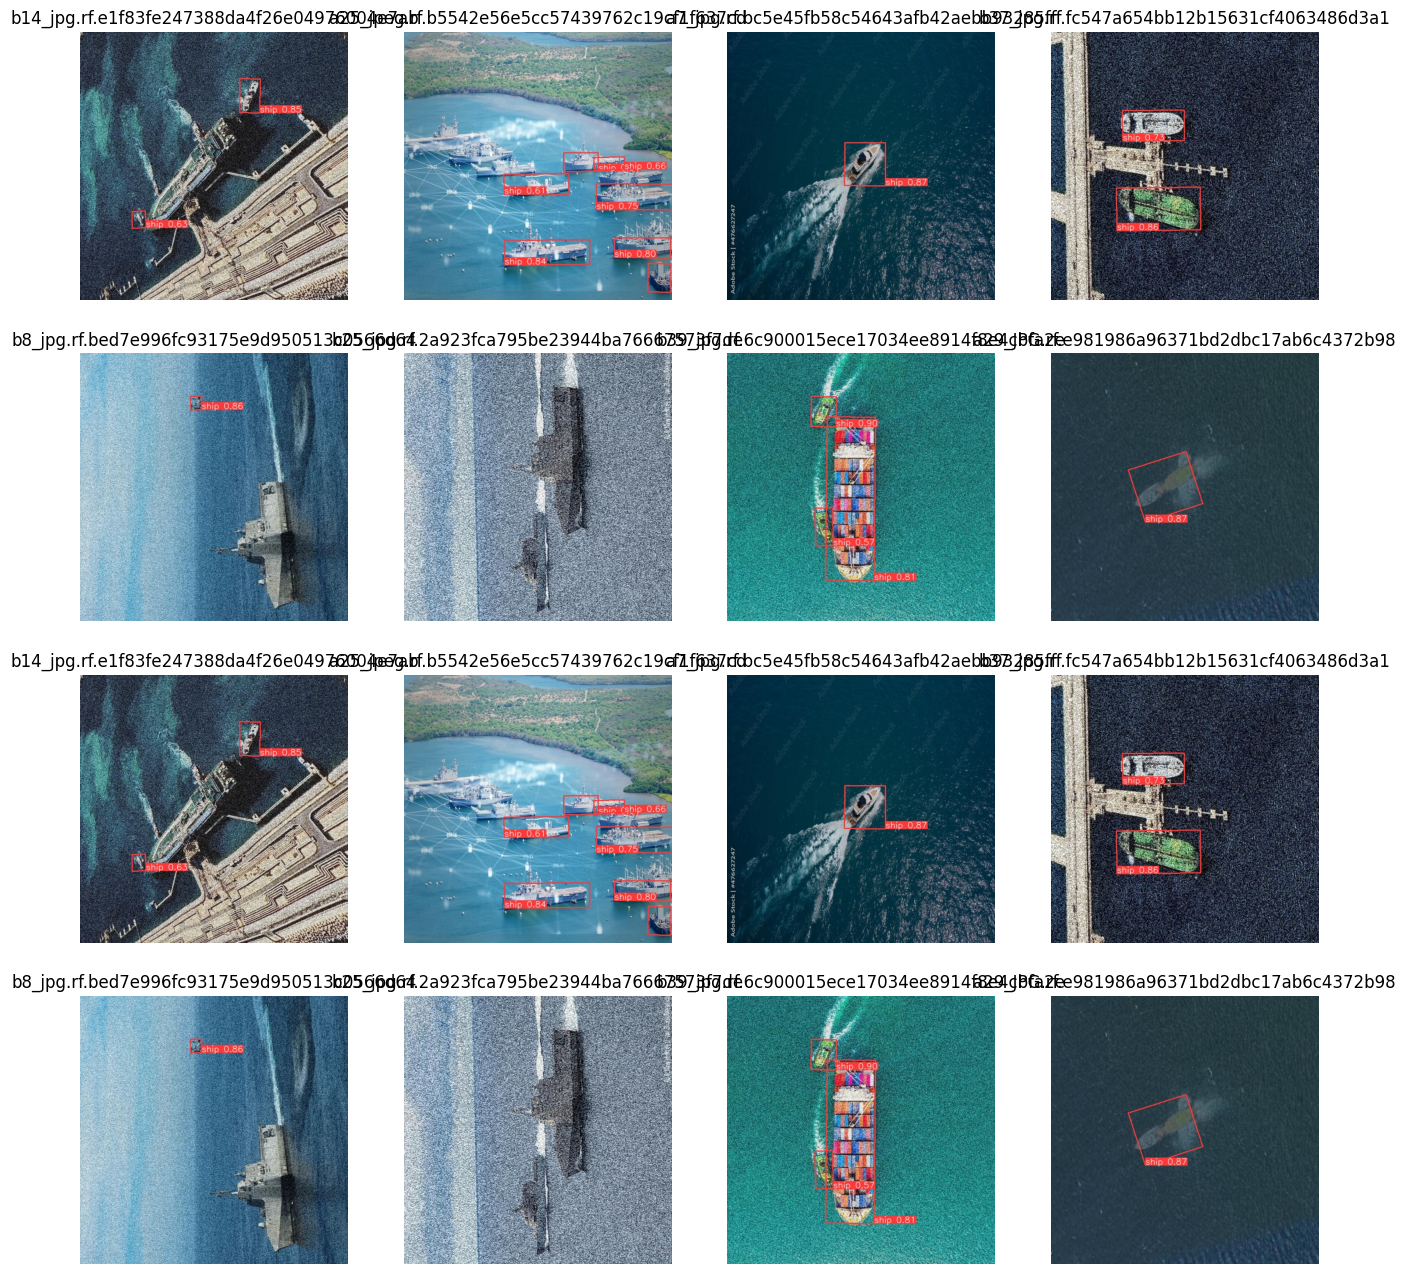

In [ ]:
import cv2
import supervision as sv

titles = [
    image_path.stem
    for image_path
    in image_paths[:SAMPLE_SIZE]]
images = [
    cv2.imread(str(image_path))
    for image_path
    in image_paths[:SAMPLE_SIZE]]

sv.plot_images_grid(images=images, titles=titles, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)

In [ ]:
INPUT_VIDEO_PATH = "/content/class.mp4"
OUTPUT_VIDEO_PATH = f"{HOME}/output.mp4"
TRAINED_MODEL_PATH = "/content/runs/obb/train6/weights/best.pt"

In [ ]:
!yolo predict model={TRAINED_MODEL_PATH} source={INPUT_VIDEO_PATH}

Ultralytics YOLOv8.1.4 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-obb summary (fused): 237 layers, 26400646 parameters, 0 gradients, 80.8 GFLOPs

video 1/1 (1/462) /content/class.mp4: 640x384 (no detections), 139.1ms
video 1/1 (2/462) /content/class.mp4: 640x384 (no detections), 26.2ms
video 1/1 (3/462) /content/class.mp4: 640x384 26.3ms
video 1/1 (4/462) /content/class.mp4: 640x384 (no detections), 26.3ms
video 1/1 (5/462) /content/class.mp4: 640x384 26.3ms
video 1/1 (6/462) /content/class.mp4: 640x384 26.3ms
video 1/1 (7/462) /content/class.mp4: 640x384 26.3ms
video 1/1 (8/462) /content/class.mp4: 640x384 26.2ms
video 1/1 (9/462) /content/class.mp4: 640x384 25.1ms
video 1/1 (10/462) /content/class.mp4: 640x384 23.8ms
video 1/1 (11/462) /content/class.mp4: 640x384 23.6ms
video 1/1 (12/462) /content/class.mp4: 640x384 23.6ms
video 1/1 (13/462) /content/class.mp4: 640x384 21.5ms
video 1/1 (14/462) /content/class.mp4: 640x384 21.5ms
video 1/1 (15/462) /content